In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/kaggle/input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv")

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


1,2 Задача классификации потому, что целевая переменная chunk - категориальная


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


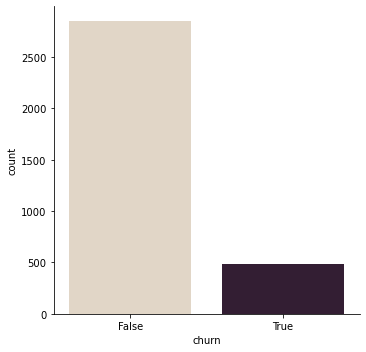

In [7]:
sns.catplot(x="churn", kind="count", palette="ch:.25", data=df)

3. Классы не збалансированы


In [8]:
df["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [9]:
df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
WA     66
CO     66
NV     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Штатов слишком много, для такого количества данных и они не вносят явного вклада в таргет (дальше будет видно). Номера телефоно вообще не нужны.


In [10]:
df_1 = df.drop(["state","phone number"], axis = 1)

In [11]:
df_2 = pd.concat([df_1, pd.get_dummies(df_1["area code"])], axis = 1)

In [12]:
df_2

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,408,415,510
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156.2,77,26.55,215.5,126,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,415,no,no,0,231.1,57,39.29,153.4,55,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,510,no,no,0,180.8,109,30.74,288.8,58,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,510,yes,no,0,213.8,105,36.35,159.6,84,...,137,6.26,5.0,10,1.35,2,False,0,0,1


In [13]:
y = df_2["churn"].map({False:0,True:1})

In [14]:
df_3 = df_2.drop(["area code", "churn"], axis = 1)

In [15]:
df_numeric = df_3.copy()

In [16]:
df_numeric["international plan"] = df_3["international plan"].map({"yes":1,"no":0})

In [17]:
df_numeric["voice mail plan"] = df_3["voice mail plan"].map({"yes":1,"no":0})

In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [19]:
df_numeric

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,408,415,510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X = scaler.fit_transform(df_numeric)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
X_train.shape

(2666, 20)

In [24]:
y_train.shape

(2666,)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[561  69]
 [ 11  26]]
0.8800599700149925


Хоть акураси и большой - видно что есть очень много ошибок 2 рода

In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn,X,y, cv = kf, scoring = "accuracy"))

[0.87406297 0.87856072 0.88755622 0.89189189 0.86636637]


accuracy как метрика неправильная ибо классы сильно несбалансированные. Правильней использовать F1 score

In [31]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn,X,y, cv = kf, scoring = "f1"))

[0.36363636 0.33057851 0.46808511 0.34545455 0.37762238]


In [32]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {"n_neighbors" : np.arange(1, 51, 2)}
cv = GridSearchCV(knn, params, cv = kf, scoring="f1")
cv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='f1')

In [33]:
cv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [34]:
cv.best_score_

0.45278195225946255

In [35]:
cv.best_params_

{'n_neighbors': 3}

При количестве соседей равном 3 модель показала лучшие реультаты

In [36]:
cv_results = pd.DataFrame(cv.cv_results_)

In [37]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005505,0.000229,0.077066,0.004039,1,{'n_neighbors': 1},0.461538,0.426036,0.413408,0.416667,0.419890,0.427508,0.017519,2
1,0.005592,0.000152,0.083263,0.000880,3,{'n_neighbors': 3},0.500000,0.408451,0.487179,0.416667,0.451613,0.452782,0.036561,1
2,0.005497,0.000118,0.086303,0.001496,5,{'n_neighbors': 5},0.363636,0.330579,0.468085,0.345455,0.377622,0.377075,0.048219,3
3,0.005553,0.000139,0.086702,0.001733,7,{'n_neighbors': 7},0.393939,0.232143,0.375940,0.310680,0.318841,0.326308,0.056929,4
4,0.005542,0.000238,0.086921,0.000874,9,{'n_neighbors': 9},0.304000,0.181818,0.437956,0.288660,0.270677,0.296622,0.082397,5
5,0.005468,0.000129,0.088275,0.001921,11,{'n_neighbors': 11},0.292683,0.201835,0.427481,0.312500,0.234375,0.293775,0.077731,6
6,0.005583,0.000133,0.090581,0.001395,13,{'n_neighbors': 13},0.264463,0.080000,0.403101,0.273684,0.193548,0.242959,0.105876,7
7,0.005580,0.000065,0.090965,0.000862,15,{'n_neighbors': 15},0.254237,0.135922,0.336000,0.236559,0.195122,0.231568,0.066214,8
8,0.005503,0.000147,0.091693,0.000971,17,{'n_neighbors': 17},0.208696,0.117647,0.338710,0.217391,0.181818,0.212852,0.071979,9
9,0.005505,0.000163,0.092238,0.001780,19,{'n_neighbors': 19},0.226087,0.117647,0.256410,0.219780,0.183333,0.200652,0.047564,10


In [38]:
import matplotlib.pyplot as plt

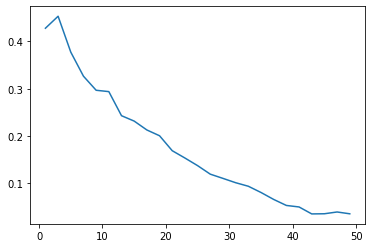

In [39]:
plt.plot(cv_results["param_n_neighbors"],cv_results["mean_test_score"])

k_best = 3

In [40]:
p_params = {"p": np.linspace(1,10,200)}
knn = KNeighborsClassifier(n_neighbors=3, weights = "distance", n_jobs = -1)
cv = GridSearchCV(knn, p_params, cv = kf, scoring="f1", verbose = 100)
cv.fit(X,y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.489, total=   1.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.388, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.459, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.400, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | ela

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=3,
                                            weights='distance'),
             param_grid={'p': array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.31658291,  1.36180905,  1.40703518,
        1.45226131,  1.49748744,  1.54271357,  1.5879397 ,  1.63316583,
        1.67839196,  1.72361809,  1.76884422,...
        8.46231156,  8.50753769,  8.55276382,  8.59798995,  8.64321608,
        8.68844221,  8.73366834,  8.77889447,  8.8241206 ,  8.86934673,
        8.91457286,  8.95979899,  9.00502513,  9.05025126,  9.09547739,
        9.14070352,  9.18592965,  9.23115578,  9.27638191,  9.32160804,
        9.36683417,  9.4120603 ,  9.45728643,  9.50251256,  9.54773869,
        9.59296482,  9.63819095,  9.68341709,  9.72864322,  9.77386935,
        9.81909548,  9.86432161,  9.90954774,  9.95477387, 10.        ])

In [41]:
cv_results = pd.DataFrame(cv.cv_results_)


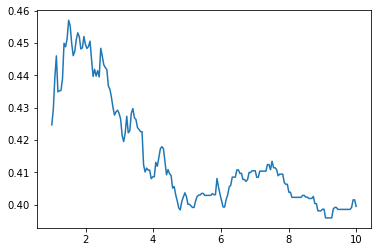

In [42]:
plt.plot(cv_results["param_p"],cv_results["mean_test_score"])

In [43]:
cv.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=1.4974874371859297,
                     weights='distance')

In [44]:
cv.best_score_

0.45709281916388705

p_best = 1.4974874371859297

Попробоуем другие модели

In [45]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_neighbors_classifier = RadiusNeighborsClassifier(radius=10)
radius_neighbors_classifier.fit(X_train, y_train)

radius_neighbors_classifier.score(X_test, y_test)

0.8575712143928036

In [46]:
from sklearn.neighbors import NearestCentroid

nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
nearest_centroid.score(X_test, y_test)

0.7166416791604198

In [47]:
from sklearn.svm import SVC

In [48]:
svc = SVC(kernel="rbf")
scores = cross_val_score(svc,X,y,cv=kf, scoring="f1")

In [49]:
scores.mean()

0.5997136395805913

In [50]:
from sklearn.ensemble import RandomForestClassifier 

In [51]:
forest = RandomForestClassifier(n_estimators = 500, max_depth=5, random_state=42)

In [52]:
scores = cross_val_score(forest, X,y, cv=kf, scoring = "f1")

In [53]:
scores.mean()

0.5209178832209067

Проведём анализ важности фич и корелляционный анализ.

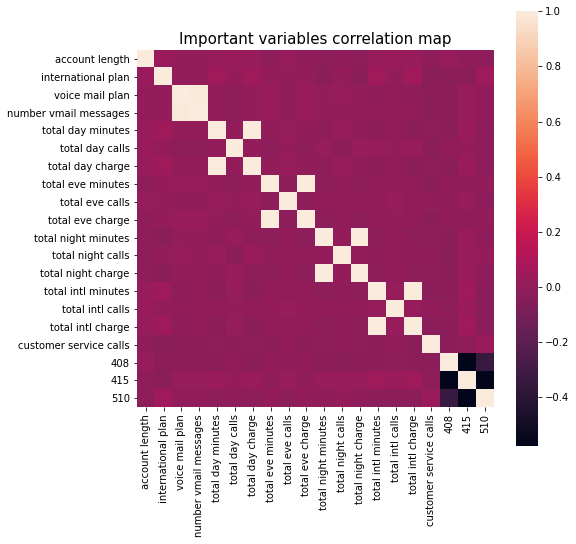

In [54]:
corrmat = df_numeric.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

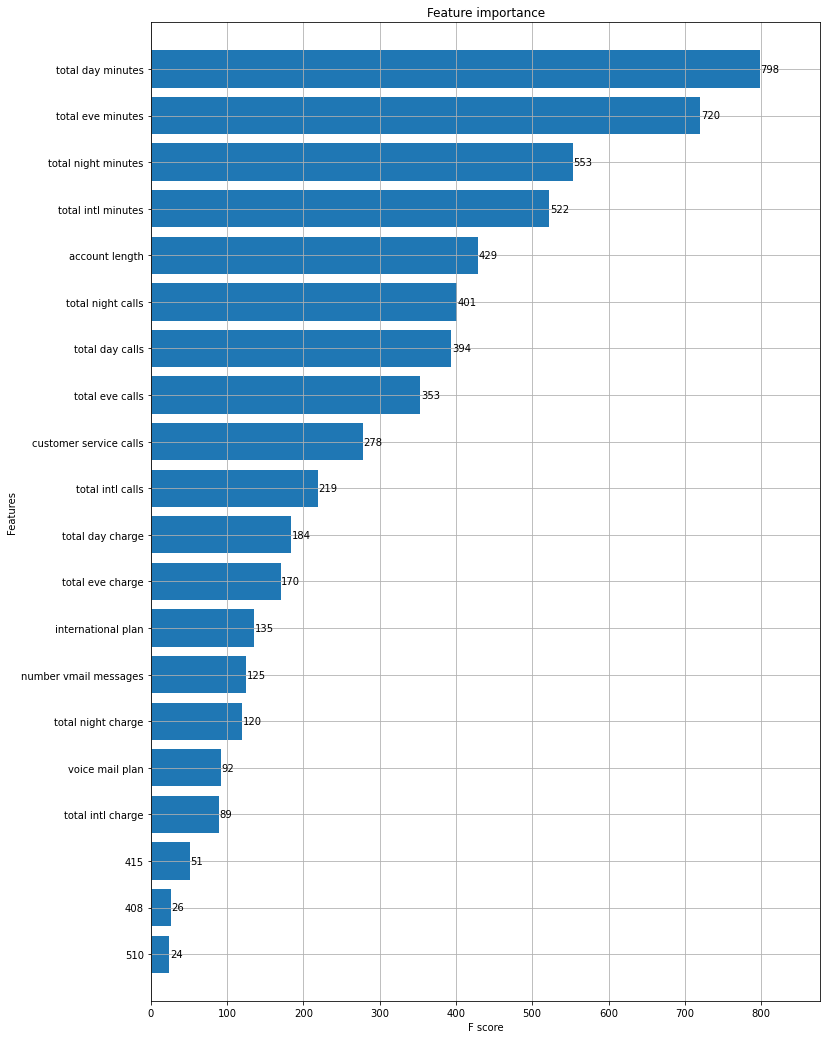

In [55]:
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(df_numeric, y)
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

Можно сделать вывод, что регионы не важны для модели

In [56]:
xgboostClassifier = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
scores = cross_val_score(xgboostClassifier,X,y,cv=kf, scoring="f1")

In [57]:
scores.mean()

0.8313801667701526

Хороший показатель, попробуем его улучшить. Попробуем наривать датасет, может визульно будет что-то видно. Так как размерность боольшая - ее нужно уменьшить.

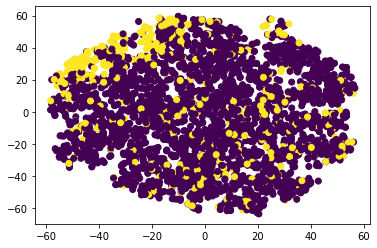

In [58]:
from sklearn.manifold import TSNE
X_1 = TSNE(n_components=2).fit_transform(df_numeric)
plt.scatter(X_1[:,0],X_1[:,1], c = y)

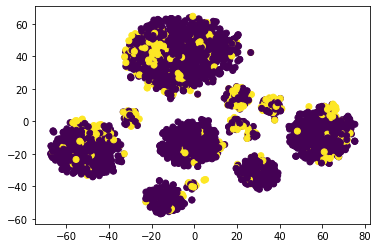

In [59]:
from sklearn.manifold import TSNE
X_1 = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_1[:,0],X_1[:,1], c = y)

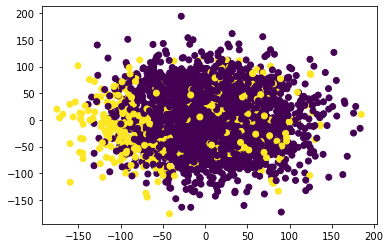

In [60]:
from sklearn.decomposition import PCA
X_2 = PCA(n_components=2).fit_transform(df_numeric)
plt.scatter(X_2[:,0],X_2[:,1], c = y)

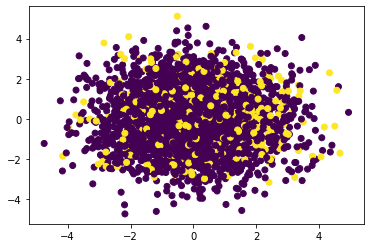

In [61]:
from sklearn.decomposition import PCA
X_3 = PCA(n_components=2).fit_transform(X)
plt.scatter(X_3[:,0],X_3[:,1], c = y)

Однако это ничего полезного не дало

Подберём гипер параметры екстремальному градиентному бустингу деревьей для улучшения её качества

In [62]:
params = {"max_depth" : np.arange(3, 11), "n_estimators":[100,150,200,250,300,400]}
xgboostClassifier = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
cv = GridSearchCV(xgboostClassifier, params, cv = kf, scoring="f1", verbose = 100)
cv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ....... max_depth=3, n_estimators=100, score=0.843, total=   0.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ....... max_depth=3, n_estimators=100, score=0.805, total=   0.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ....... max_depth=3, n_estimators=100, score=0.859, total=   0.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ....... max_depth=3, n_estimators=100, score=0.777, total=   0.4s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=7, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None, nthread=10,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
 

In [63]:
cv_results = pd.DataFrame(cv.cv_results_)

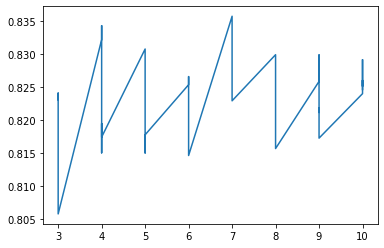

In [64]:
plt.plot(cv_results["param_max_depth"],cv_results["mean_test_score"])

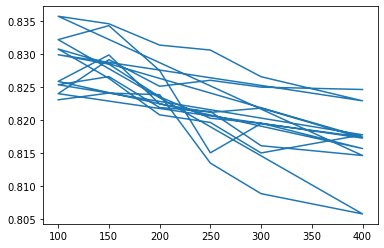

In [65]:
plt.plot(cv_results["param_n_estimators"],cv_results["mean_test_score"])

In [66]:
cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=10, nthread=10, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [67]:
cv.best_score_

0.8357630555117008

Как результат лучшей моделью для данного датасета оказалась XGBoostClassifier с параметрами max_depth = 7, n_estimators = 100

Это с учётом того что были удалены штаты из-за предположения что штатов много, а даннах мало и модель просто не сможет нормально учесть штаты. Пробуем со штатами.

In [68]:
df_states = df.copy()

In [69]:
df_states = df_states.drop("phone number", axis = 1)

In [70]:
df_states

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [72]:
df_states['state'] = label_encoder.fit_transform(df_states['state'])
df_states['international plan'] = label_encoder.fit_transform(df_states['international plan'])
df_states['voice mail plan'] = label_encoder.fit_transform(df_states['voice mail plan'])

In [73]:
df_states = df_states.drop("churn", axis = 1)

In [74]:
X = scaler.fit_transform(df_states)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gboost= GradientBoostingClassifier(max_depth=7, n_estimators = 100)
score = cross_val_score(gboost,X,y,cv = kf, scoring = "f1")

In [76]:
scores.mean()

0.8313801667701526

Возможно не зватает просто данных для обучения, увеличю количество fold

In [77]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
gboost= GradientBoostingClassifier(max_depth=7, n_estimators = 100)
score = cross_val_score(gboost,X,y,cv = kf, scoring = "f1")
score.mean()

0.8320375177280933

In [78]:
xgboost = xgb.XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
score = cross_val_score(gboost,X,y,cv = kf, scoring = "f1")
score.mean()

0.8329263245007258

Добавление штатов как и ожидалось не принесло улучшений

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [80]:
from sklearn.metrics import classification_report
xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)
print('Gradient Boosting Classifier:\n {}\n'.format(classification_report(y_test,y_pred)))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.90      0.76      0.83        97

    accuracy                           0.95       667
   macro avg       0.93      0.87      0.90       667
weighted avg       0.95      0.95      0.95       667




Всё еще есть ошибки 2 рода, но их уже меньше.